<a href="https://colab.research.google.com/github/kolisachint/ExploreDataWithColab/blob/master/NN/LSTM-RNN/SKSDLCTrainingNotebookClass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TrainingNotebook.ipynb_
 
# Sears Deep Learning Center AI Training 
# April 9th, 2019
# Lesson 1
​
1.   Make a copy of this Notebook.
2.   Let us look at a fictitious store
3. Load the data
4. Explore the data
5. Quick view with head()
6. Let us look at column names
7. How many rows do we have ?
8. How many BUs are there ?
9. How many rows do you have for Each BU ?
10. Describe basic statistics of the data ?
11. How many unique categoryGroups does the data set have ?
12. What is earliest week we have data for ? what is the latest week we have data for ?
13. Which rows have sales greater than X ? Which rows have  qunatity less than Y ?
14. Which rows have sales greated than X and quantity  less than Y ?
15. Anomaly Detection Using a Neural Network ( AutoEncoder) 
16. Predictions using LSTM, RNN
​


<b>Import Dependency Libraries<b>

In [0]:
# DO NOT TINKER
import os

# numpy for array manimulation and pandas for file loading and data manipulation
import numpy as np
import pandas as pd
import time
import math

# Keras models for neural network creation and learning
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
import keras.backend as K
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn.cluster import KMeans
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from keras.utils.data_utils import get_file

# matplotlib for plotting the graphs
import matplotlib.pyplot as plt
import warnings
from keras.models import load_model

warnings.filterwarnings('ignore')

import locale
locale.setlocale( locale.LC_ALL, '' )
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<b>Read and Preprocess the data<b>

In [0]:
 df = pd.read_csv('https://raw.githubusercontent.com/brat-shc/Lessons/master/csv_data_dump_fake_store.csv')
df.wk_nbr = df.wk_nbr.astype(str)

In [0]:
#Tinker
df.columns

Index(['wk_nbr', 'bu', 'division', 'category_group', 'total_quantity',
       'total_sales', 'total_margin'],
      dtype='object')

In [0]:
#TINKER
df.head()

,wk_nbr,bu,division,category_group,total_quantity,total_sales,total_margin
0,201851,FOOTWEAR,FOOTWEAR,MENS,81,2017.660,1312.018
1,201725,SPORTING GOODS,SPORT GD ATHLETIC,RACQUET SPORTS,78,428.420,259.741
2,201622,JEWELRY,JEWELRY,COLOR JEWELRY,5,163.050,79.250
3,201824,AUTO,CAR CARE,EQUIPMENT/TOOLS,4,139.960,74.760
4,201531,GROCERY & HOUSEHOLD,READERS MARKET,KS - SOUVENIRS,1373,6377.490,3211.068


**Display the list if column names in dataset**

**Fetch Series from Pandas Dataframe and finding uniques **

In [0]:
#TINKER
# Show me all the Unique BUs in the dataset 
df['bu'].unique()
# Q: What happens if you do not put the ' '
# Q: Can you show all the Unique divisions 

array(['FOOTWEAR', 'SPORTING GOODS', 'JEWELRY', 'AUTO',
       'GROCERY & HOUSEHOLD', 'ELECTRONICS', 'OUTDOOR LIVING',
       'DRUG STORE', 'HOME', 'APPLIANCES', "APPAREL - MEN'S APPAREL",
       'APPAREL - ACCESSORIES', 'TOYS', 'SUPPORT UNITS',
       'APPAREL - INTIMATE APPAREL', 'PHARMACY', 'SEASONAL',
       'LAWN & GARDEN', 'APPAREL - RTW / WOMENS',
       'APPAREL - CHILDRENS / KIDS', 'OTHER',
       'MATTRESS / HOME BIG TICKET', 'TOOLS & PAINT',
       'APPAREL - OFF-PRICE APPAREL', 'STRATEGIC MERCHANDISING'],
      dtype=object)

**Find occurance count of all unique elements in Dataframe Series**

In [0]:
# TINKER
# Shows number of Rows in Each 
df['bu'].value_counts()


HOME                           20363
GROCERY & HOUSEHOLD            16137
DRUG STORE                     14036
APPAREL - CHILDRENS / KIDS     10932
APPAREL - MEN'S APPAREL         8277
TOYS                            7879
TOOLS & PAINT                   7095
SPORTING GOODS                  6850
ELECTRONICS                     6674
FOOTWEAR                        6174
AUTO                            5303
APPAREL - RTW / WOMENS          5298
SUPPORT UNITS                   4478
JEWELRY                         4435
APPAREL - INTIMATE APPAREL      4094
APPAREL - ACCESSORIES           2848
LAWN & GARDEN                   1713
APPLIANCES                      1619
OUTDOOR LIVING                  1484
SEASONAL                        1115
STRATEGIC MERCHANDISING          982
PHARMACY                         454
APPAREL - OFF-PRICE APPAREL      431
OTHER                            227
MATTRESS / HOME BIG TICKET        91
Name: bu, dtype: int64

**Get statistical description of a dataframe.**

In [0]:
df.describe()

,total_quantity,total_sales,total_margin
count,138989.000,138989.000,138989.000
mean,574.136,3687.993,1485.873
std,2050.460,11231.673,4125.736
min,-18.000,-1199.980,-122799.161
25%,12.000,191.550,91.111
50%,58.000,794.090,396.189
75%,244.000,2712.580,1212.170
max,53796.000,206334.800,94445.144


**Number of unique elements in Series**

In [0]:
# TINKER
df['category_group'].nunique()
# How many Unique Divisions do you have ?

924

**Find minimum of a Series**

In [0]:
df['wk_nbr'].min()

'201444'

**Find Maximum of a Series**

In [0]:
df['wk_nbr'].max()

'201909'

**Filter Dataframe based on conditional statement**

In [0]:
df[(df['total_sales'] >=100000)]

,wk_nbr,bu,division,category_group,total_quantity,total_sales,total_margin
31,201527,PHARMACY,PHARMACY,PRESCRIPTION,1725,116431.100,23286.220
109,201833,DRUG STORE,HEALTH CARE,VITAMINS,4972,102789.000,58597.847
350,201844,PHARMACY,PHARMACY,PRESCRIPTION,1924,150638.120,30127.624
466,201731,DRUG STORE,HEALTH CARE,VITAMINS,6026,126783.430,66030.632
688,201638,PHARMACY,PHARMACY,PRESCRIPTION,2154,145127.800,29025.560
733,201635,PHARMACY,PHARMACY,PRESCRIPTION,2046,144942.690,28988.538
1128,201852,DRUG STORE,HEALTH CARE,VITAMINS,5086,108813.130,56799.156
1187,201723,PHARMACY,PHARMACY,PRESCRIPTION,1856,111258.240,22251.648
1228,201714,PHARMACY,PHARMACY,PRESCRIPTION,1653,145678.340,29135.668
1232,201626,PHARMACY,PHARMACY,PRESCRIPTION,1787,116342.050,23268.410


In [0]:
df[(df['total_quantity'] <=1000)]

,wk_nbr,bu,division,category_group,total_quantity,total_sales,total_margin
0,201851,FOOTWEAR,FOOTWEAR,MENS,81,2017.660,1312.018
1,201725,SPORTING GOODS,SPORT GD ATHLETIC,RACQUET SPORTS,78,428.420,259.741
2,201622,JEWELRY,JEWELRY,COLOR JEWELRY,5,163.050,79.250
3,201824,AUTO,CAR CARE,EQUIPMENT/TOOLS,4,139.960,74.760
5,201552,AUTO,CAR CARE,OIL,199,1864.090,591.489
6,201651,ELECTRONICS,HOME ENTERTAINMENT,PRE-RECORDED MUSIC,2,12.380,5.380
7,201530,OUTDOOR LIVING,OUTDOOR LIVING,BASIC DECOR,10,12.400,-6.703
10,201636,HOME,SOFT HOME,SHOWER CURTAINS,240,3292.070,2045.199
11,201612,ELECTRONICS,HOME ELECTRONICS,DVD HARDWARE,96,4566.300,1487.310
12,201630,FOOTWEAR,FOOTWEAR,WOMENS,61,1397.190,818.070


**Composite condition based on AND of two conditions for filtering**

In [0]:
# TINKER
df[(df['total_sales'] >=100000) & (df['total_quantity'] <=1000)]

,wk_nbr,bu,division,category_group,total_quantity,total_sales,total_margin
11521,201743,ELECTRONICS,HOME ELECTRONICS,TUBE TELEVISIONS,670,206334.800,22685.788
16359,201543,ELECTRONICS,HOME ELECTRONICS,TUBE TELEVISIONS,778,195751.430,18114.023
36744,201643,ELECTRONICS,HOME ELECTRONICS,TUBE TELEVISIONS,660,153698.750,23368.880


**Filter to find the rows belonging to single catagory group and then find the mean**

In [0]:
# TINKER
df[df.category_group=='TUBE TELEVISIONS'].mean()


wk_nbr                 inf
total_quantity      82.211
total_sales      23636.283
total_margin      3757.506
dtype: float64

**Group Dataframe by column and then sum them up**

In [0]:
df_bu = df.groupby(['bu']).sum()
df_bu

,total_quantity,total_sales,total_margin
bu,,,
APPAREL - ACCESSORIES,127290,1504009.450,933300.007
APPAREL - CHILDRENS / KIDS,1437637,16223012.630,8568529.351
APPAREL - INTIMATE APPAREL,605708,5268331.070,2914319.884
APPAREL - MEN'S APPAREL,1247475,16125929.420,7831281.277
APPAREL - OFF-PRICE APPAREL,17885,109191.210,32445.672
APPAREL - RTW / WOMENS,632842,7551411.550,3612560.033
APPLIANCES,139881,6218705.230,1904695.788
AUTO,394341,4581440.800,2164803.479
DRUG STORE,14776567,105858777.990,48980212.805


**Sort Dataframe by a column, in descending order **

In [0]:
# TINKER
df_bu.sort_values(['total_sales'],ascending=False)
# Q sort by Margin Descending 

,total_quantity,total_sales,total_margin
bu,,,
GROCERY & HOUSEHOLD,44876659,174434795.160,52245448.860
DRUG STORE,14776567,105858777.990,48980212.805
HOME,3037622,32493090.450,14057611.141
PHARMACY,440033,31116516.730,6292181.326
SUPPORT UNITS,6202480,29470206.530,19053409.413
TOYS,1607147,19990126.100,9781204.268
APPAREL - CHILDRENS / KIDS,1437637,16223012.630,8568529.351
SPORTING GOODS,833978,16158318.080,6917225.965
APPAREL - MEN'S APPAREL,1247475,16125929.420,7831281.277


**Display Sales variation for the *GROCERY & HOUSEHOLD* BU for 2018 onwards as a graph **

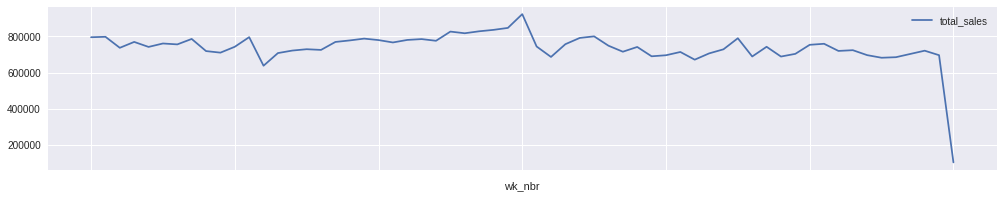

In [0]:
# TINKER
df_1yr = df[(df.wk_nbr>='201801')& (df.bu == 'GROCERY & HOUSEHOLD')]
df_1yr = df_1yr.groupby(['wk_nbr','bu'],as_index=False).sum()
df_1yr = df_1yr.sort_values('wk_nbr').reset_index(drop=True)
df_1yr.plot(x='wk_nbr', y='total_sales',kind='line',figsize=(17,3))

#### Function definitions

In [0]:
# DO NOT TINKER 
def find_where_upper_limit(df,upper_limit,metric="total_sales"):
  res = df[df[metric]<= upper_limit]
  return res

def find_where_lower_limit(df,lower_limit,metric="total_sales"):
  res = df[df[metric]>= lower_limit]
  return res

def find_margin_greater_than(df,value):
  res =df[df["total_margin"] >= value]
  return res

def find_margin_less_than(df,value):
  res =df[df["total_margin"] <= value]
  return res

def find_sales_less_than(df,value):
  res =df[df["total_sales"] <= value]
  return res

def find_sales_greater_than(df,value):
  res =df[df["total_sales"] >= value]
  return res

def find_quantity_greater_than(df,value):
  res =df[df["total_quantity"] >= value]
  return res

def find_quantity_less_than(df,value):
  res =df[df["total_quantity"] <= value]
  return res

def value_for_week(name,wk_nbr,metric):
    try:
      return df[(df.category_group == name)&(df.wk_nbr==wk_nbr)][metric].values[0]
    except:
        return 0.0

def change_wow_lastYear(name,wk_nbr,metric):
    try:
        return (1 - (value_for_week(name=name,wk_nbr=str(int(wk_nbr)-100),metric=metric) / value_for_week(name=name,wk_nbr=wk_nbr,metric=metric)))*100
    except:
        return np.nan

def find_greater_lastYear(df,metric,x):
  res=df.copy()
  res["change%_lastYear"] = res.apply(lambda row: change_wow_lastYear(name=row.category_group,wk_nbr=row.wk_nbr,metric=metric), axis=1)
  res = res[res["change%_lastYear"] >= x]
  return res

def find_lesser_lastYear(df,metric,x):
  res=df.copy()
  res["change%_lastYear"] = res.apply(lambda row: change_wow_lastYear(name=row.category_group,wk_nbr=row.wk_nbr,metric=metric), axis=1)
  res = res[res["change%_lastYear"] <= x]
  return res

In [0]:
#TINKER
find_sales_greater_than(df,100000)
# Q Call all Functions 
# Q Can you add & Operator to the Functions 


,wk_nbr,bu,division,category_group,total_quantity,total_sales,total_margin
31,201527,PHARMACY,PHARMACY,PRESCRIPTION,1725,116431.100,23286.220
109,201833,DRUG STORE,HEALTH CARE,VITAMINS,4972,102789.000,58597.847
350,201844,PHARMACY,PHARMACY,PRESCRIPTION,1924,150638.120,30127.624
466,201731,DRUG STORE,HEALTH CARE,VITAMINS,6026,126783.430,66030.632
688,201638,PHARMACY,PHARMACY,PRESCRIPTION,2154,145127.800,29025.560
733,201635,PHARMACY,PHARMACY,PRESCRIPTION,2046,144942.690,28988.538
1128,201852,DRUG STORE,HEALTH CARE,VITAMINS,5086,108813.130,56799.156
1187,201723,PHARMACY,PHARMACY,PRESCRIPTION,1856,111258.240,22251.648
1228,201714,PHARMACY,PHARMACY,PRESCRIPTION,1653,145678.340,29135.668
1232,201626,PHARMACY,PHARMACY,PRESCRIPTION,1787,116342.050,23268.410


In [0]:
#TINKER
find_lesser_lastYear(df,'total_sales',10)
# Q Call all Functions 
# Q Can you add & Operator to the Functions 

In [0]:
# TINKER 
# Let us look at our dataset. 
# Q: Can you make df.head() show more rows
df.head()

**Anomaly detection with autoencoders**

In [0]:

# DO NOT TINKER# 
# Processing and scaling data 
def load_data_with_category(df):

    df['year'] = df['wk_nbr'].astype('str').str.slice(0, 4)
    df['week'] = df['wk_nbr'].astype('str').str.slice(4,)
    
    df=df.sort_values(by='wk_nbr').reset_index()
    df = df[df.bu != 'PHARMACY']
    df = df[df.bu != 'OTHER']
    df = df[df.bu != 'SUPPORT UNITS']

    subln_sales = df.groupby(['category_group'], as_index = False)['total_quantity','total_sales','total_margin'].mean()
    imp_subln = subln_sales[subln_sales.total_sales >2000]
    df = df[df.category_group.isin(imp_subln.category_group.unique())]

    df = df[df.division != 'GREETING CARDS']
    df = df[df.division != 'HALLOWEEN / THANKSGIVING']
    df = df[df.division != 'VALENTINES']
    df = df[df.division != 'SOUVENIRS']
    df = df[df.division != 'EASTER']
    df = df[df.division != 'PARTY SUPPLIES']
    df=df[['year','week','division','category_group','total_quantity', 'total_sales', 'total_margin']]
    print("Read file : "+str(df.shape))
    df=df.dropna()
    print("Dropped NAN: "+str(df.shape))
    
    train_x=df[df['year']!='2019']
    
    test_x=df[df['year']=='2019']
    
    test_x.to_csv("test_with_category_new_2.csv")
  
    le2=preprocessing.LabelEncoder()
    df['division'] = le2.fit_transform(df.division.values)
    
    le3=preprocessing.LabelEncoder()
    df['category_group'] = le3.fit_transform(df.category_group.values)
    
    train_x=df[df['year']!='2019']
    
    test_x=df[df['year']=='2019']
    train_x=train_x.drop(['year'], axis=1)
    test_x=test_x.drop(['year'], axis=1)
    
    scaler = MinMaxScaler()
    train_x=scaler.fit_transform(train_x.values)
    
    test_x=scaler.transform(test_x.values)

    return train_x, test_x


In [0]:

# Test and training split
train_x, test_x=load_data_with_category(df)

#loading the model
model_path = get_file(
            "anomaly_detector.h5",
            'https://github.com/bswalia/autoencoder_model/blob/master/anomaly_detector.h5?raw=true')
model = load_model(model_path)

predict=model.predict(test_x)


In [0]:

#Get RMSE for the reconstruction 
def get_recontruction_error(actual_data, pred_data):

    minus_list= list(np.array(actual_data) - np.array(pred_data))
    square_list= [i ** 2 for i in minus_list]
    mean_square_error= sum(square_list)/(len(square_list))
    rmse= math.sqrt(mean_square_error)
    return rmse


In [0]:
actual=test_x

#get rmse for each category group
rmse=get_recontruction_error(actual[0], predict[0])
anomaly = []
for i in range(len(actual)):
    rmse=get_recontruction_error(actual[i], predict[i])
    anomaly.append(rmse)

In [0]:
#reading the test file
df_test = pd.read_csv('https://raw.githubusercontent.com/bswalia/autoencoder_model/master/anomaly_detector_testdata.csv')

df_test=df_test.loc[:, ~df_test.columns.str.contains('^Unnamed')]
df_test['RMSE']=pd.DataFrame(anomaly)

#Choosing category groups with RMSE >=0.28
df_anomaly=df_test[df_test['RMSE']>=0.28]
df_anomaly=df_anomaly.sort_values(by='RMSE',ascending=False)
df_anomaly.columns = ['year', 'week', 'division', 'category_group','total_quantity', 'total_sales', 'total_margin', 'RMSE']

#Computing averages
df_avgs = df[df.year == '2018'].groupby(['division','category_group'],as_index = False)['total_quantity','total_sales','total_margin'].mean()
df_avgs.columns = ['division', 'category_group', '2018_avgquantity', '2018_avgsales','2018_avgmargin']
df_anomaly = df_anomaly.merge(df_avgs, how = 'left', on = ['division', 'category_group'])

#Adding 2019 averages
df_avgs2019 = df[df.year == '2019'].groupby(['division','category_group'],as_index = False)['total_quantity','total_sales','total_margin'].mean()
df_avgs2019.columns = ['division', 'category_group', '2019_avgquantity', '2019_avgsales',
       '2019_avgmargin']
df_anomaly = df_anomaly.merge(df_avgs2019, how = 'left', on = ['division', 'category_group'])

#Adding deviation from 2018 averages
df_anomaly['deviation_sales'] = df_anomaly['total_sales'] - df_anomaly['2018_avgsales']
df_anomaly['deviation_quantity'] = df_anomaly['total_quantity'] - df_anomaly['2018_avgquantity']
df_anomaly['deviation_margin'] = df_anomaly['total_margin'] - df_anomaly['2018_avgmargin']

df_anomaly['%deviation_sales'] = ((df_anomaly['total_sales'] - df_anomaly['2018_avgsales'])/df_anomaly['2018_avgsales']) * 100
df_anomaly['%deviation_quantity'] = (df_anomaly['total_quantity'] - df_anomaly['2018_avgquantity'])/df_anomaly['2018_avgquantity'] * 100
df_anomaly['%deviation_margin'] = (df_anomaly['total_margin'] - df_anomaly['2018_avgmargin'])/df_anomaly['2018_avgmargin'] * 100
df_anomaly['avg_price_deviation'] = (df_anomaly['total_sales']/df_anomaly['total_quantity']) - (df_anomaly['2018_avgsales']/df_anomaly['2018_avgquantity'])

df_2018 = df[df.year == '2018']
df_2017 = df[df.year == '2017']
df_2018['week'] = df_2018['week'].astype('int')
df_2018.columns = ['wk_nbr', 'bu', 'division', 'category_group',  '2018_quantity', '2018_sales', '2018_margin', 'year', 'week']

#Adding 2018 data for comparison
df_anomaly = df_anomaly.merge(df_2018[['division', 'category_group','week' ,'2018_quantity','2018_sales','2018_margin']], how = 'left', 
                              on = ['division', 'category_group','week'])

#code to reindex columns
df_anomaly.columns = ['year', 'week', 'division', 'category_group',
       'quantity', 'sales', 'margin', 'RMSE',
       '2018_avgquantity', '2018_avgsales', '2018_avgmargin',
       '2019_avgquantity', '2019_avgsales', '2019_avgmargin',
       'dev_sales', 'dev_quantity', 'dev_margin',
       '%dev_sales', '%dev_quantity', '%dev_margin',
       'avg_price_deviation', 'lastyear_quantity', 'lastyear_sales', 'lastyear_margin']

columnsT = ['year', 'week', 'division', 'category_group',
       'quantity','lastyear_quantity','2018_avgquantity', '2019_avgquantity',
        'sales', 'lastyear_sales','2018_avgsales', '2019_avgsales', 
        'margin', 'lastyear_margin','2018_avgmargin', '2019_avgmargin',
       'dev_sales', 'dev_quantity', 'dev_margin',
       '%dev_sales', '%dev_quantity', '%dev_margin','avg_price_deviation','RMSE']
df_anomaly = df_anomaly.reindex(columns=columnsT)

In [0]:
#Top 20 anomalies by RMSE
df_anomaly.head(20)

### Prediction using LSTM - RNN


In [0]:
pos = pd.read_csv('https://raw.githubusercontent.com/brat-shc/Lessons/master/store_data.csv', index_col=False)
# Replace all the NaNs in the data with 0
pos.fillna(0, inplace=True)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(pos)
pos = pd.DataFrame(scaled_df, columns=['wknbr', 's1', 'm1', 'b1', 's2', 'm2', 'b2', 's3', 'm3', 'b3', 's4', 'm4', 'b4', 's5', 'm5', 'b5', 's6', 'm6', 'b6', 's7', 'm7', 'b7', 's8', 'm8', 'b8', 's9', 'm9', 'b9', 's10', 'm10', 'b10', 's11', 'm11', 'b11', 's12', 'm12', 'b12', 's13', 'm13', 'b13', 's14', 'm14', 'b14', 's15', 'm15', 'b15', 's16', 'm16', 'b16', 's17', 'm17', 'b17', 's18', 'm18', 'b18', 's19', 'm19', 'b19', 's20', 'm20', 'b20', 's21', 'm21', 'b21', 's22', 'm22', 'b22', 's23', 'm23', 'b23', 's24', 'm24', 'b24', 's25', 'm25', 'b25', 's26', 'm26', 'b26', 's27', 'm27', 'b27', 's28', 'm28', 'b28', 's29', 'm29', 'b29', 's30', 'm30', 'b30', 's31', 'm31', 'b31', 's32', 'm32', 'b32', 's33', 'm33', 'b33', 's34', 'm34', 'b34', 's35', 'm35', 'b35', 's36', 'm36', 'b36', 's37', 'm37', 'b37', 's38', 'm38', 'b38', 's39', 'm39', 'b39', 's40', 'm40', 'b40', 's41', 'm41', 'b41', 's42', 'm42', 'b42', 's43', 'm43', 'b43', 's44', 'm44', 'b44', 's45', 'm45', 'b45', 's46', 'm46', 'b46', 's47', 'm47', 'b47', 's48', 'm48', 'b48', 's49', 'm49', 'b49', 's50', 'm50', 'b50', 's51', 'm51', 'b51', 's52', 'm52', 'b52', 's53', 'm53', 'b53', 's54', 'm54', 'b54', 's55', 'm55', 'b55'])

In [0]:
from keras.utils.data_utils import get_file
model_path = get_file(
            "storePredictor.h5",
            'https://github.com/brat-shc/Lessons/blob/master/storePredictor.h5?raw=true')
model = load_model(model_path)

**LSTM for predicting store sales performance based on previous financial data**

<b>Goal:</b> To identify underlying trends, and predict the store sales in the coming weeks, based on the previous sale figures time series of the store.

<b>Why LSTM:</b> Long Short-Term Memory (LSTM) recurrent neural networks are models with memory of recent events, and perfect tools for time series data or steps data like handwriting recognition, trends identification etc.
They provide a great benefit in time series forecasting, where classical linear methods can be difficult to adapt to multivariate or multiple input forecasting problems.

<b>Data:</b> We have taken the data above, which contains the sales data over past 370 weeks in 55 departments, thus having a 371 weeks time series of 55x3=165 features each.

<b>Training method:</b> A moving window of size 20 weeks is applied on this time series, thus learning to predict the store sale in the 21st week, based on the trend of last 20 weeks.


<b>Results:</b> Results are plotted on a graph. X-axis is the number of the week. Blue line is the actual sale, while green line is the predicted sale by the trained LSTM.



In [0]:
# Load the saved model
pos.reset_index()    
# Initialize arrays for expected and predicted results
y_expec = np.empty((1,1))
y_predi = np.empty((1,1))

# roll the window of length 20 from start to 350th week for predicting
for y in range(0,350,1):
    # take input as 20 data points of 165 length each
    p1 = pos.iloc[y:y+20, 1:166]
    # take output as 21st data point
    p = pos.iloc[y+20:y+21, 1:166]
    p1.reset_index(drop=True, inplace=True)
    p.reset_index(drop=True, inplace=True)
    # define the output as the sum of all the sales in the store across 55 departments in the 21st week
    output = [p['s1'][0]+p['s2'][0]+p['s3'][0]+p['s4'][0]+p['s5'][0]+p['s6'][0]+p['s7'][0]+p['s8'][0]+p['s9'][0]+p['s10'][0]+p['s11'][0]+p['s12'][0]+p['s13'][0]+p['s14'][0]+p['s15'][0]+p['s16'][0]+p['s17'][0]+p['s18'][0]+p['s19'][0]+p['s20'][0]+p['s21'][0]+p['s22'][0]+p['s23'][0]+p['s24'][0]+p['s25'][0]+p['s26'][0]+p['s27'][0]+p['s28'][0]+p['s29'][0]+p['s30'][0]+p['s31'][0]+p['s32'][0]+p['s33'][0]+p['s34'][0]+p['s35'][0]+p['s36'][0]+p['s37'][0]+p['s38'][0]+p['s39'][0]+p['s40'][0]+p['s41'][0]+p['s42'][0]+p['s43'][0]+p['s44'][0]+p['s45'][0]+p['s46'][0]+p['s47'][0]+p['s48'][0]+p['s49'][0]+p['s50'][0]+p['s51'][0]+p['s52'][0]+p['s53'][0]+p['s54'][0]+p['s55'][0]]
    output = np.asarray(output).reshape(1,1)
    
    #reshape input and outputs as required to feed the network
    X_train = np.asarray(p1).reshape(1,20,165)
    y_train = output
    
    # make predictions
    y_pred = model.predict(X_train)
    
    # collect actual and predicted in numpy arrays
    y_expec = np.hstack((y_expec, y_train*152283))
    y_predi = np.hstack((y_predi, y_pred*152283))
    
    #print('Week# '+str(y)+' actual sale: '+ locale.currency(round(y_train[0][0]*152283), grouping=True)+' vs predicted sale: '+ locale.currency(round(y_pred[0][0]*152283), grouping=True))
    
    
# plot the predictions
avg_error = round(math.sqrt(mean_squared_error(y_expec, y_predi)))
print('Average Root Mean Squared Error: '+ locale.currency( avg_error, grouping=True))
x_plot = pd.DataFrame(data={'col':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351]})
plt.figure(figsize=(20,10))
plt.plot(x_plot, y_expec[0]) 
fig = plt.plot(x_plot, y_predi[0]) 

In [0]:
df_y_predi = pd.DataFrame(y_predi)